# EssentiallyR

Getting started with R

![](https://static1.squarespace.com/static/597b53473e00be6b05be544b/5b269af5f950b7fedf1e1e8d/5b3a83f7562fa75b2b911155/1530564452859/?format=1000w)

Source: [Essential R: What you need to get started from Penn State](https://onlinecourses.science.psu.edu/stat485/sites/onlinecourses.science.psu.edu.stat485/files/EssentialR/index.pdf)


#### Loops in R

In [1]:
for (i in 1:27) {
    cat(letters[i])
}

abcdefghijklmnopqrstuvwxyzNA

In [11]:
for (i in sample(x = 1:26, size = 14)) cat(LETTERS[i])

BVWXTPNCRYOAKE

#### `factor()`

WE can use the function `factor()` to convert a vector to a factor:

In [12]:
cols <- c("Blue", "Blue", "Red", "Red", "Blue", "Yellow", "Green")
summary(cols)

   Length     Class      Mode 
        7 character character 

`summary(cols)` shows us the frequency for some of the levels.

In [13]:
cols[2]

[1] "Blue"

In [15]:
cols <- factor(cols)
cols[2]

[1] Blue
Levels: Blue Green Red Yellow

The `(str(cols))` reports that it is factor, and snows us the numeric representatino of it

In [16]:
str(cols)

 Factor w/ 4 levels "Blue","Green",..: 1 1 3 3 1 4 2


`levels()` shows us all the levels for a factor

In [17]:
levels(cols)

[1] "Blue"   "Green"  "Red"    "Yellow"

`table()` to see a frequency table for our factors. 

In [18]:
table(cols)

cols
  Blue  Green    Red Yellow 
     3      1      2      1 

In [20]:
b <- table(cols)
b[3]

Red 
  2

In [21]:
b[3] *4

Red 
  8

### Visualizing Qualitative Variables

`barplot()` is used for a _graphical summary_ of a factor. However, we use `table()` with `barplot()` since `barplot()` requires the values it will plot its __height__ argument in numerical form

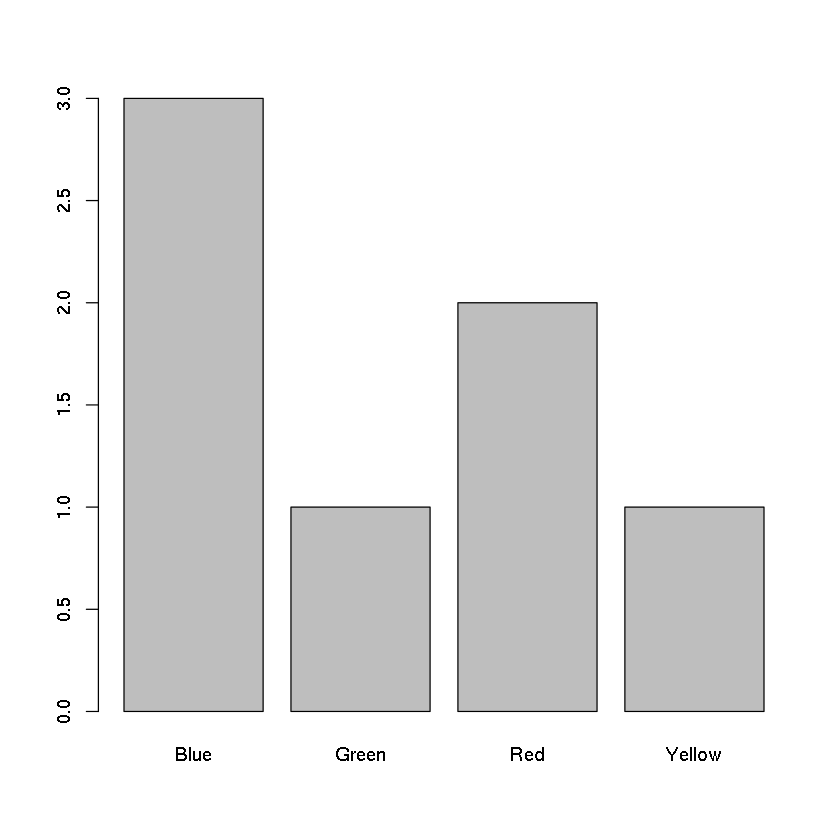

In [24]:
barplot(table(cols))

`plot(cols)` gives the barplot a second plot= because the data is categorical. 

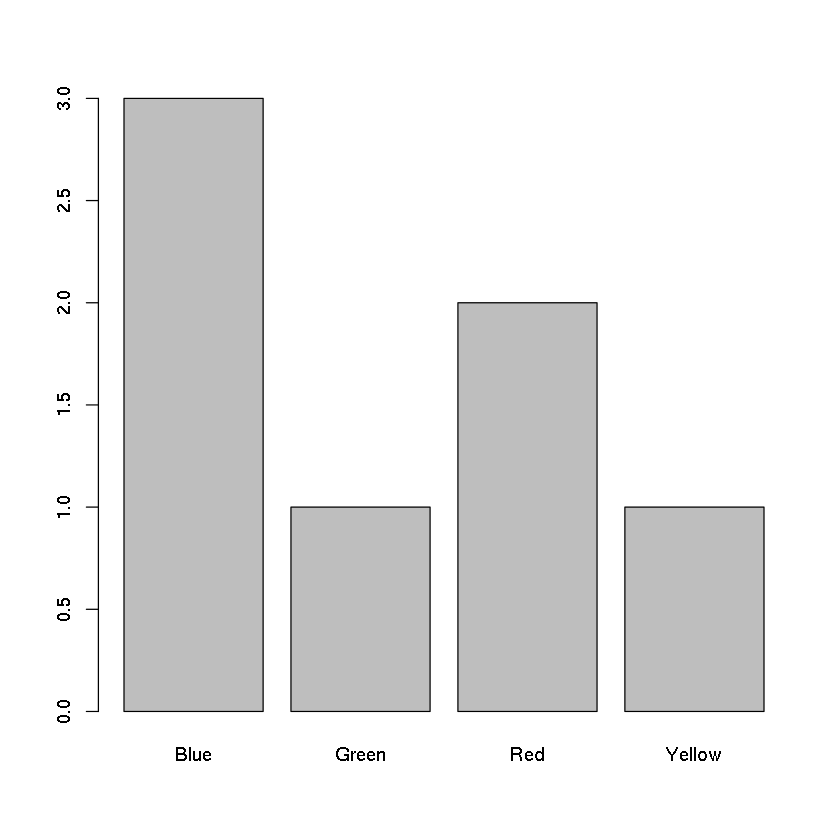

In [25]:
plot(cols)

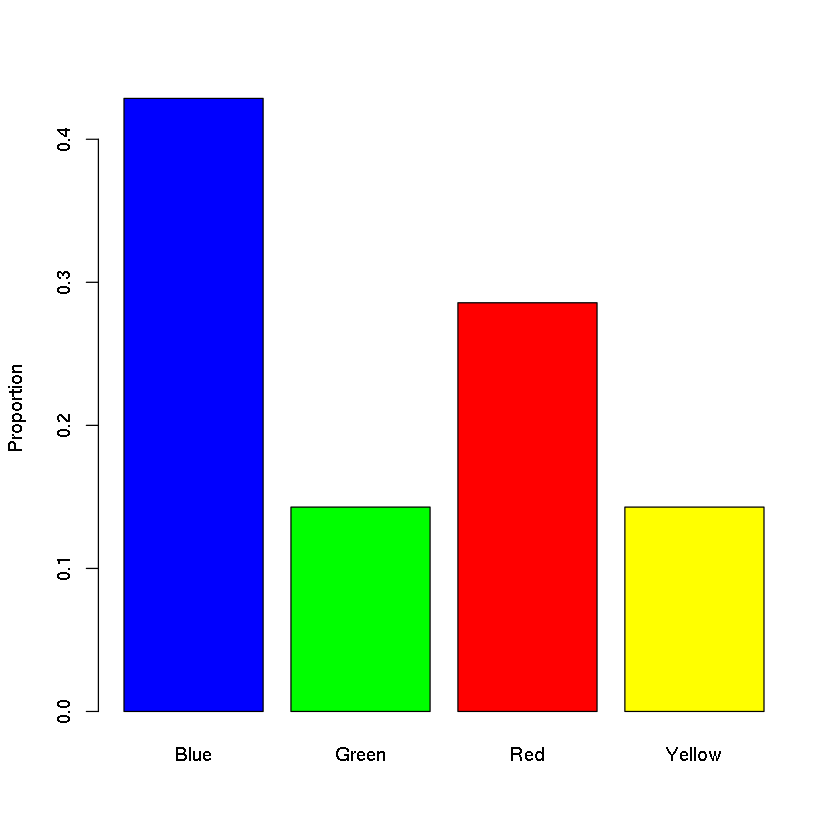

In [26]:
barplot(b/length(cols), col = c("blue", "green", "red", "yellow"),
       ylab = "Proportion")

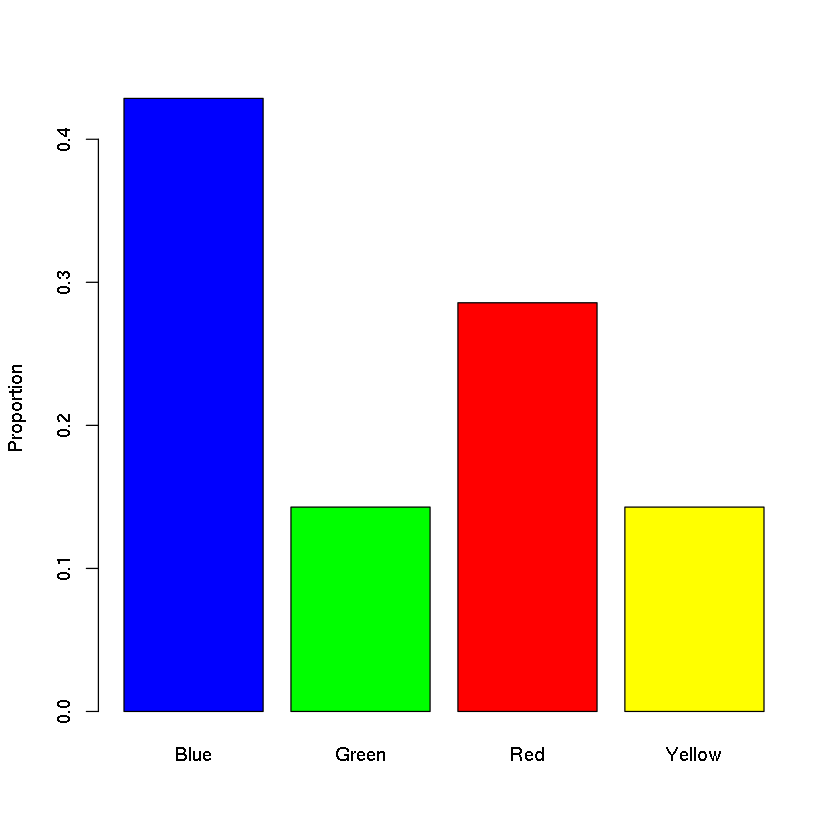

In [27]:
barplot(table(cols)/length(cols), col = levels(cols),
       ylab="Proportion")

create a pie chart

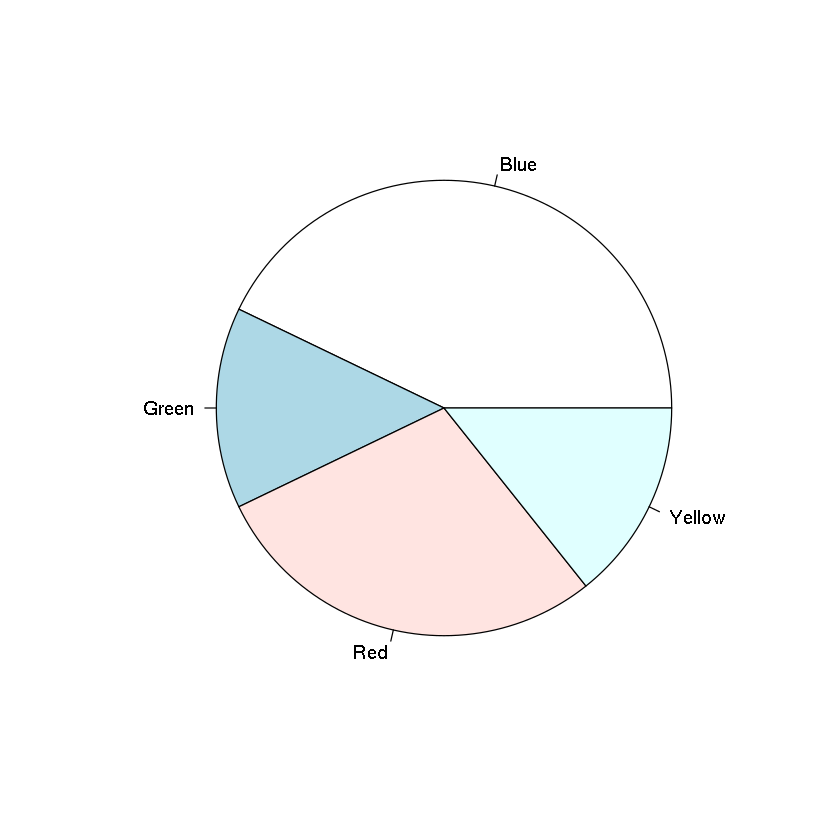

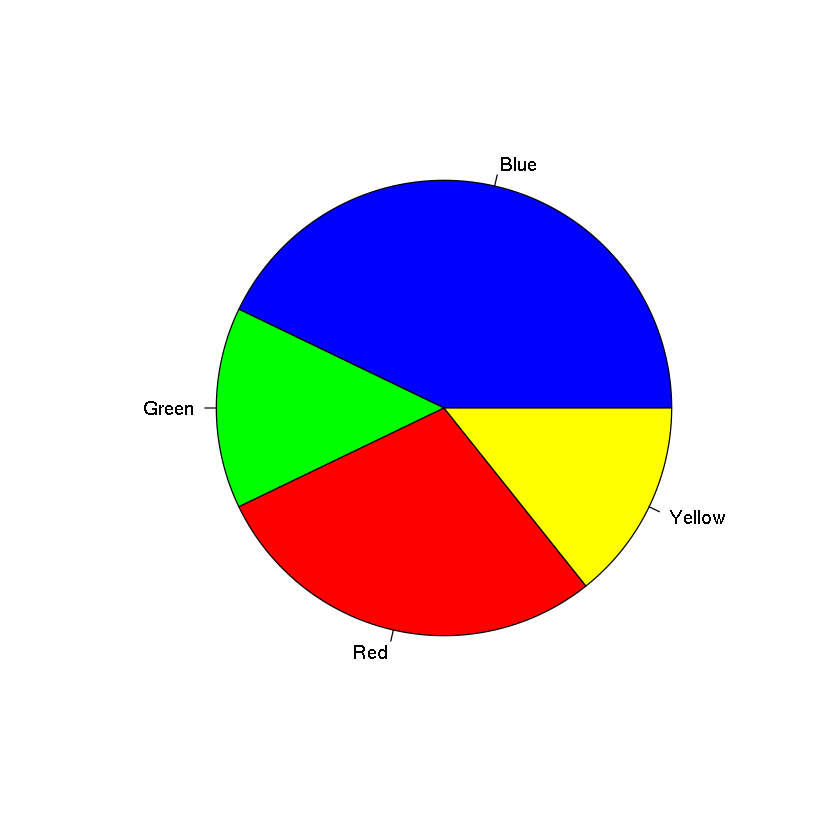

In [28]:
pie(table(cols))
pie(b, col = c("blue", "green", 'red', 'yellow'))

Numerically coded factors

In [31]:
a <- factor(scan(text = "2 4 3 3 2 1 1 2 3 4 2 3 3 4 1 3 2 1 4 3 2 4"))
table(a)

a
1 2 3 4 
4 6 7 5 

we used `scan()` when entering a longer list to be easier than using `c()`.

use `levels()` to _set_ leevls as well as to return them.

In [33]:
levels(a) <- c("<14", "15-24", "25-34", ">35")
# scan(text='some text string with spaces separating value')
table(a)

a
  <14 15-24 25-34   >35 
    4     6     7     5 

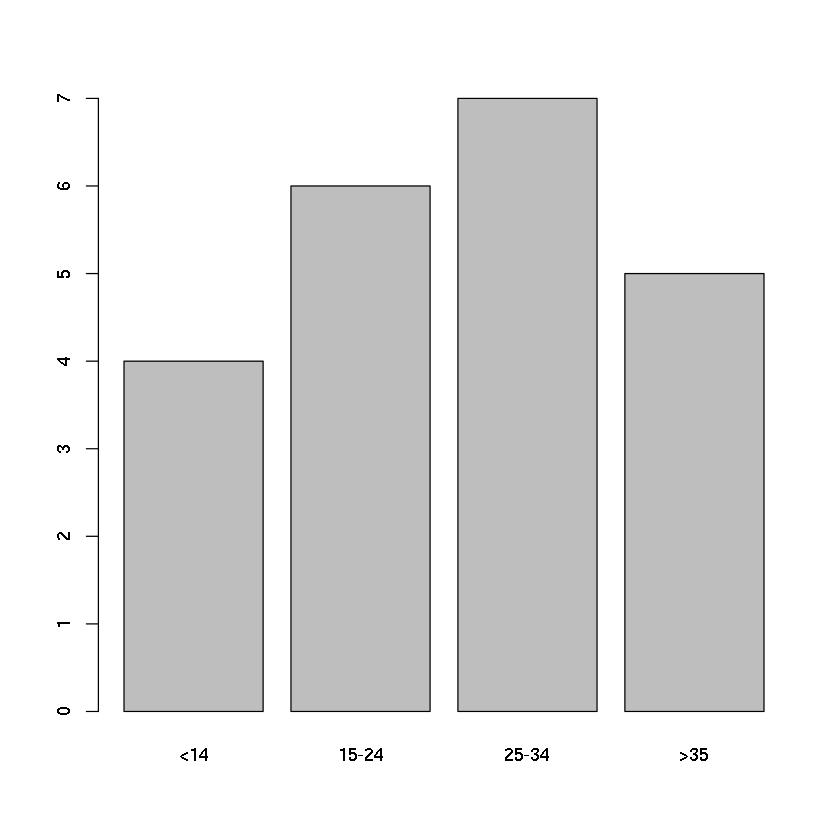

In [34]:
barplot(table(a))

#### How factors are stored in R

Factors are stores as a list of levels and an integer vector representing the elvel of each element of the factor. 

In [35]:
a <- c(1,1,4,5)
str(a)

 num [1:4] 1 1 4 5


In [37]:
(a <- as.factor(a))

[1] 1 1 4 5
Levels: 1 4 5

So our factor a, with values 1,1,4,5 has three levels: 1 4 5.


In [38]:
str(a)

 Factor w/ 3 levels "1","4","5": 1 1 2 3


In [39]:
levels(a)

[1] "1" "4" "5"

use `as.numeric()` to convert factors to numeric.  However as you can see in this case we dont get the original values, __we get the integer representation__

In [40]:
as.numeric(a)

[1] 1 1 2 3

In [41]:
str(a)

 Factor w/ 3 levels "1","4","5": 1 1 2 3


This can be solved by frist converting to character and then to numeric __to return the orignal values__

In [42]:
as.numeric(as.character(a))

[1] 1 1 4 5

mixed character factors

In [43]:
(b <- c("-.1", "2.7", "B"))

[1] "-.1" "2.7" "B"

In [44]:
str(b)

 chr [1:3] "-.1" "2.7" "B"


In [45]:
as.numeric(b)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] -0.1  2.7   NA

#### Chancing FActor LEvels

In [46]:
cols <- factor(c("Blue", "Blue", "Red", "Red", "Bleu", "Yellow", "Green"))
levels(cols)

[1] "Bleu"   "Blue"   "Green"  "Red"    "Yellow"

In [47]:
levels(cols) <- c("B", "B", "G", "R", "Y")
levels(cols)

[1] "B" "G" "R" "Y"

In [49]:
levels(cols) <- c("Yellow", "Blue", "Green", "Red")
levels(cols)

[1] "Yellow" "Blue"   "Green"  "Red"

In [54]:
cols

[1] Yellow Yellow Green  Green  Yellow Red    Blue  
Levels: Yellow Blue Green Red

In [55]:
cols[-6]

[1] Yellow Yellow Green  Green  Yellow Blue  
Levels: Yellow Blue Green Red

use the `droplevels()` functio nto drop unused factor levels

In [56]:
droplevels(cols[-6])

[1] Yellow Yellow Green  Green  Yellow Blue  
Levels: Yellow Blue Green

use the `levels = ` argument of `factor()` to __set the orders__

In [57]:
x <- factor(c("L", "M", "H"))
y <- factor(x, levels = c("L", "M", "H"))
x

[1] L M H
Levels: H L M

In [58]:
y

[1] L M H
Levels: L M H

levels are listed from _lowest to highest_

In [60]:
z <- factor(x, levels = c("L", "M", "H"), ordered = TRUE)
z

[1] L M H
Levels: L < M < H

In [61]:
str(y)

 Factor w/ 3 levels "L","M","H": 1 2 3


In [62]:
str(z)

 Ord.factor w/ 3 levels "L"<"M"<"H": 1 2 3


In [63]:
y > "L"

Warning message in Ops.factor(y, "L"):
“‘>’ not meaningful for factors”

[1] NA NA NA

In [64]:
z > "L"

[1] FALSE  TRUE  TRUE

### Hypothesis Testing for Factors

__We may want to test hypotheses about a qualitative variable. For example, if we roll a die 50 times and get
“6” 12 times how likely is it that the die is fair?__ (This really is a factor - it just have numeric levels.)

__defintion:__ `prop.test` can be used for testing the null that the proportions (probabilities of success) in several groups are the same, or that they equal certain given values.

use the `prop.test()` __proportion test__ to compare an observed frequency against a hypothesized frequency and calcluate a _p-value_ for the difference. 

In [66]:
prop.test(x = 12, n = 50, p = 1/6, alt = "greater")


	1-sample proportions test with continuity correction

data:  12 out of 50, null probability 1/6
X-squared = 1.444, df = 1, p-value = 0.1147
alternative hypothesis: true p is greater than 0.1666667
95 percent confidence interval:
 0.1475106 1.0000000
sample estimates:
   p 
0.24 


__interpretation:__ _(above)_ we observed frequency is 12 out of 50, and the theoretial probability is 1/6. Our _alternative hypothesis_ is that the probability is greater than 1/6.

The p-value here is 0.115, so we __dont have very strong evidence of an unfair die__.

Test 2:

Another way to approach this question is to simulate the problem in R. 
1. `sample()` function is used to _randomly choose values_ so sample(1:6) would be like rolling a fair die, 
2. `sample(1:6, size=50, replace=TRUE)` like rolling the die 50 times. 
3. add the logical test `==6` asks: _how many 6's come up_
4. calling `sum()` on the logical test _adds up the number of TRUEs_

In [67]:
# roll a die 50 times
sample(x = 1:6, size = 50, replace = TRUE) 

[1] 3 2 4 2 5 2 1 5 4 1 2 2 4 1 5 1 4 3 6 2 2 1 1 6 3 4 5 4 1 5 2 3 1 3 6 4 2 5
[39] 1 4 2 4 1 6 1 4 1 4 3 1

In [68]:
# how many times is it 6?
sum(sample(1:6, 50, TRUE)==6) 

[1] 12

If we repeat this 100 times we could see _how frequent a value of 12 or greater is_ using a `loop`. 
1. create a vector of `NAs` to store the data
2. use the loop to run `sum(sample(1:6, 50, TRUE)==6)` 100 times

In [69]:
die <- rep(NA, 100) # vector to store results
for (i in 1:100){
    die[i] <- sum(sample(1:6, 50, TRUE)==6)
}
table(die)

die
 2  4  5  6  7  8  9 10 11 12 13 14 15 17 
 2  7  8 10 14 14 13 12  7  6  3  1  2  1 

In [70]:
sum(die >= 12)

[1] 13

so a value of 12 or greater comes up 13% of the time, which is a bit different from the p-value we got from `prop.test()`, to get a more stable p-value we prob need to try this 1000 time rather than a hundred. 

In [72]:
prop.test(x = 12, n = 10000, p=1/6, alt = "greater")


	1-sample proportions test with continuity correction

data:  12 out of 10000, null probability 1/6
X-squared = 1970.1, df = 1, p-value = 1
alternative hypothesis: true p is greater than 0.1666667
95 percent confidence interval:
 0.0007114301 1.0000000000
sample estimates:
     p 
0.0012 


here our observed frequency is 12 out 10000 with the theoretical probability os 1/6 and alternative hypothesis is that the probability is greater than 1/6. 

# Chapter 3: Quantitative Variables

### working with numeric data

we begin with some data that represents the size of a group of mp3 files (in MB) and return some summary statistics

In [1]:
mp3 <- scan(text = "5.3 3.6 5.5 4.7 6.7 4.3 4.3 8.9 5.1 5.8 4.4")
mean(mp3)

[1] 5.327273

In [2]:
var(mp3)

[1] 2.130182

In [3]:
sd(mp3)

[1] 1.459514

In [4]:
median(mp3)

[1] 5.1

In [5]:
summary(mp3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.600   4.350   5.100   5.327   5.650   8.900 

`fivenum()` returns the upper and lower hinges, while the `summary()` returns the 1st and 3rd quartiles, and these can differ signtly depending on the number of data points 

In [6]:
fivenum(mp3)

[1] 3.60 4.35 5.10 5.65 8.90

`quantile()` can return any desired result

In [7]:
quantile(mp3, c(0.25, 0.75))

25%  75% 
4.35 5.65

In [8]:
quantile(mp3, c(0.18, 0.36, 0.54, 0.72, 0.9))

18%  36%  54%  72%  90% 
4.30 4.58 5.18 5.56 6.70

### Hypothesis Testing

if we thought the mean was 4.5, we could test if the data support this making a `t-test`. 

___t___ is the difference between observed and hypothesized means in units of the standard error and the standard error of the mean is standard deviaiton divided by the square root of _n_.

we use `pt()` to calcuate probabilities for __t-distributions__


In [11]:
t <- (mean(mp3) - 4.5) / (sd(mp3)/sqrt(length(mp3)))
t

[1] 1.879909

`pt()`: Density, distribution function, quantile function and random generation for the t distribution with df degrees of freedom (and optional non-centrality parameter ncp).

In [14]:
pt(t, df = length(mp3) - 1, lower.tail = FALSE) * 2 # *2 for 2 sided test

[1] 0.08953719

built in functino for the __t-test__:

In [15]:
t.test(mp3, mu = 4.5)


	One Sample t-test

data:  mp3
t = 1.8799, df = 10, p-value = 0.08954
alternative hypothesis: true mean is not equal to 4.5
95 percent confidence interval:
 4.346758 6.307788
sample estimates:
mean of x 
 5.327273 


### Resistant measures of center and spread

since the mean and standard deviation can be quite sensitive to ourliers, it is sometimes useful to consider adding an outlier to our mp3 data and experiment

In [16]:
mean(mp3)

[1] 5.327273

In [17]:
mp3[8] <- 10.8
mean(mp3)

[1] 5.5

In [18]:
median(mp3)

[1] 5.1

The _median is substantially lower_ than the mean

In [19]:
mean(mp3, trim = 0.1)

[1] 5.122222

The trimed mean is much closer to the median. 

__Trimming mean__ more of the data will get still closer to the median. 

For __resistance measures of spread__ one candidate is the __"Interquartile range"__ IQR: which is the difference between the 3rd and 1st quartiles. 


In [20]:
IQR(mp3)

[1] 1.3


Another canidate is the __"median absolute deviatin (MAD)"__ which is the median of the absoluate differences from the median, scaled by a constant. 

Compute the median absolute deviation, i.e., the (lo-/hi-) median of the absolute deviations from the median, and (by default) adjust by a factor for asymptotically normal consistency.

In [21]:
median(abs(mp3 - median(mp3))) * 1.4826

[1] 1.03782

In [22]:
mad(mp3)

[1] 1.03782

### Visualizing Quantitative Data

most common is the __histogram__

In [24]:
# add another album mp3 file
mp3[8] <- 8.9
mp3 <- c(mp3, scan(text = "4.9 5 4.9 5.4 6.2 5.6 5.1 5.8 5.5 6.7 7"))


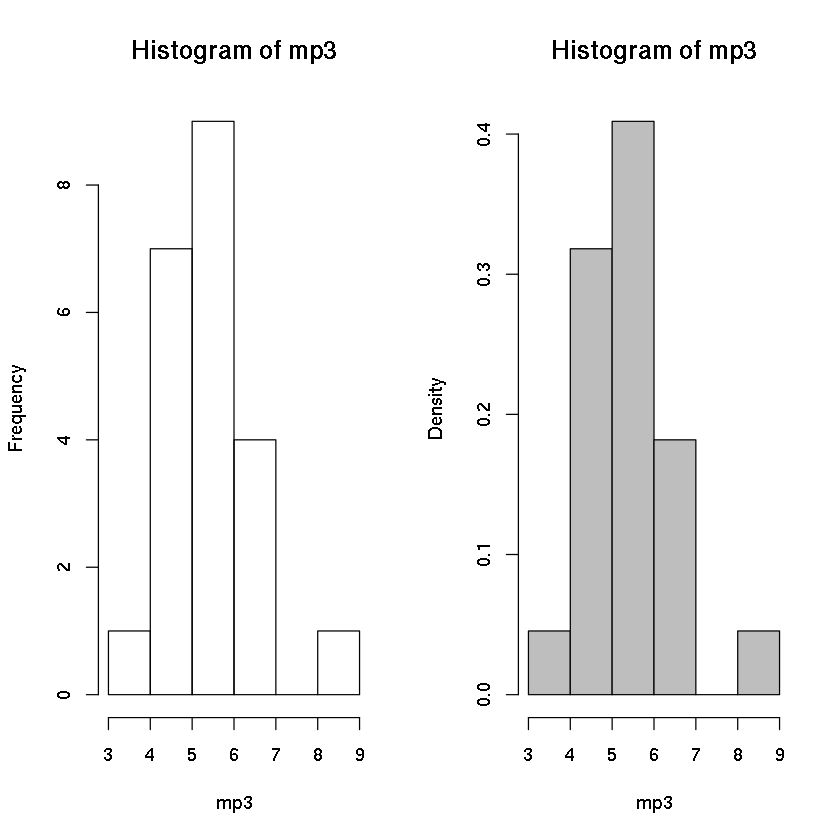

In [26]:
par(mfrow = c(1,2)) # split the plot
hist(mp3)
hist(mp3, prob = TRUE, col = "grey")

we have 2 versins of the histogram
1) y-axis units of _frequency_ so the scale changes for differing n

2) units of _probability_ so distribution with differing _n_ can be compared

Anonother useful visualization is the __Kernel Density estimate (KDE) (density estimate)__ which is a probability density function

`density()`:The (S3) generic function density computes kernel density estimates. Its default method does so with the given kernel and bandwidth for univariate observations.

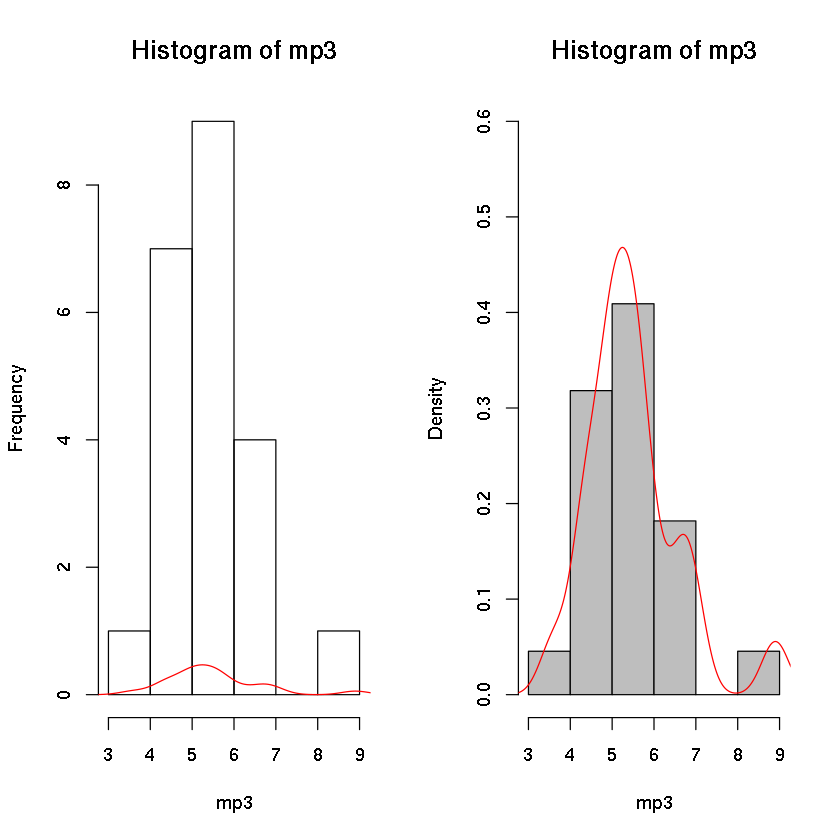

In [30]:
par(mfrow = c(1,2))  # split the plot
hist(mp3)
lines(density(mp3), col = "red")

hist(mp3, probability = TRUE, col = 'grey', ylim = c(0, 0.6))
lines(density(mp3), col = 'red')

`rnorm()` used to generate some random data from the __normal distribution__

The r in `rnorm()` means “random”; runif() generates some uniformly distributed random data,

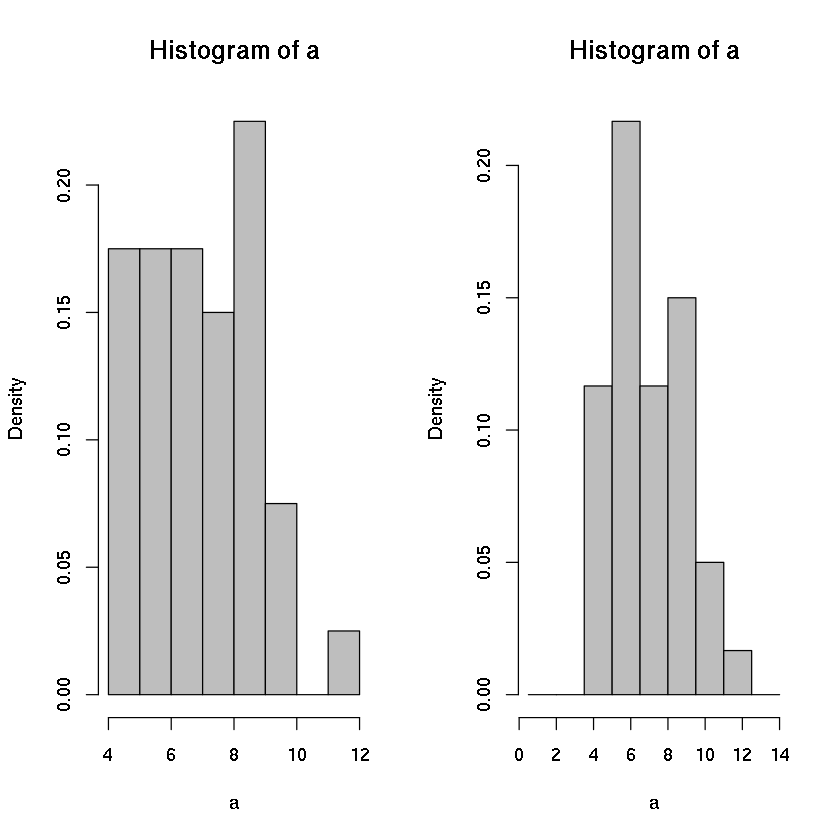

In [31]:
par(mfrow = c(1,2)) #split the plot
a <- rnorm(n = 40, mean = 7, sd = 2)
hist(a, prob = T, col = "grey")
hist(a, prob = T, col = "grey", breaks = seq(0.5, 14, 1.5))

(above) both graphs show the same data, however the `breaks = ` argument can be used to specify where the bins are in the histogram. Here we used th function `seq()` to create a sequence with lower and upper bounds and step size (.5 14 1.5)

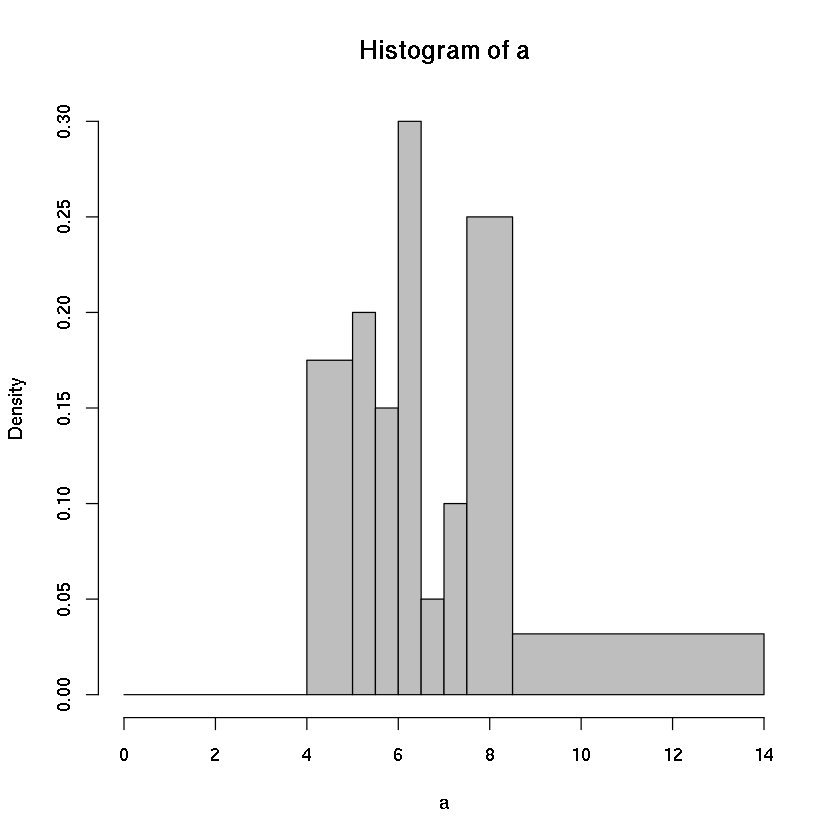

In [32]:
hist(a, prob = T, col = "grey", breaks=c(0,4,5,5.5,6,6.5,7,7.5,8.5,14))

#### Boxplots
useful visualization of quantitative data which shows the median, lower and upper "hinges"  and upper and lower shiskers. 

They can also be notched to show a confidence interval about the median. Values beyond the whiskers are possible _outliers_

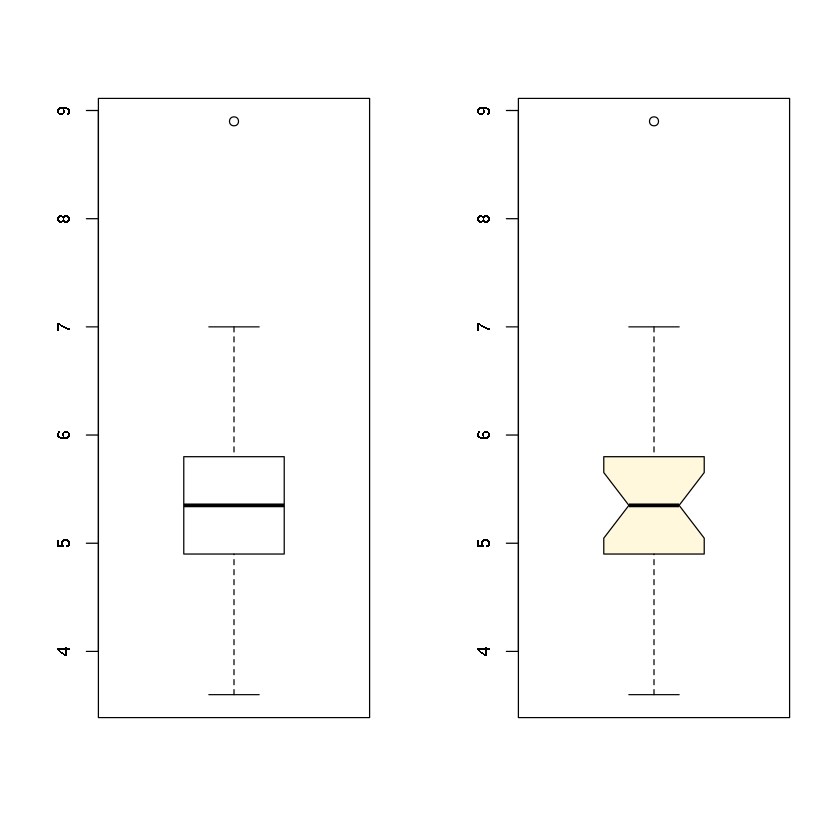

In [34]:
par(mfrow = c(1,2))
boxplot(mp3)
boxplot(mp3, notch = TRUE, col = "cornsilk")

value 8.9 appears to be the outlier

visualize "raw" data
x = indices
y = values 

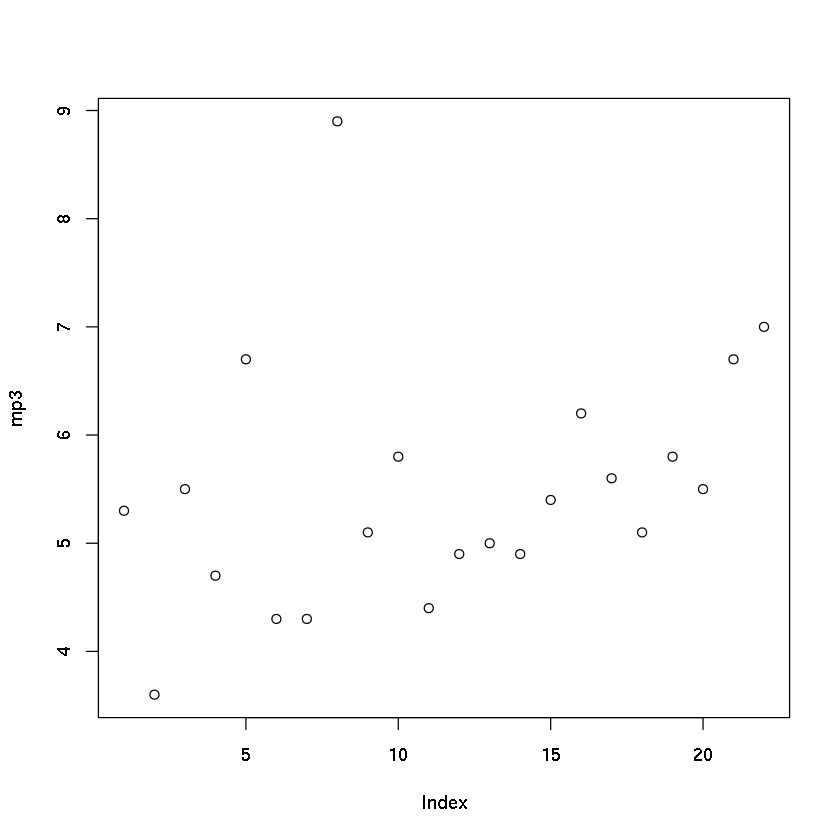

In [35]:
plot(mp3)

the advantage of letting us look
for structure in the data (though it won’t work for very large datasets).

Other plots include:
`stripchart` which is a sort of _"one-dimensional scatterplot"_. the `method = ` argument tells R how to display values that would over plot

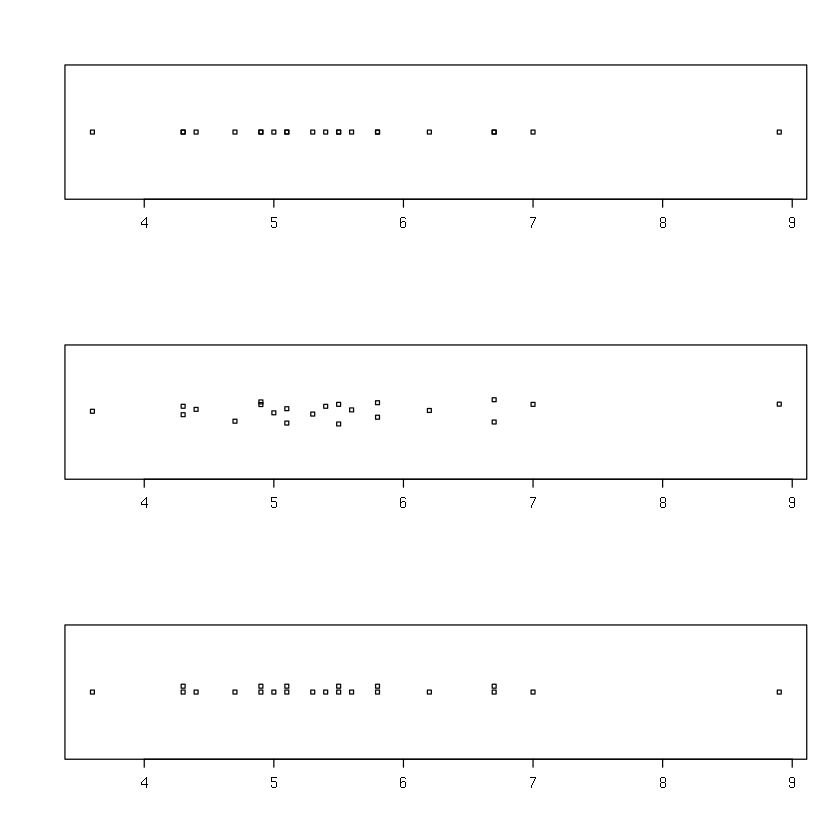

In [36]:
par(mfrow = c(3,1))
stripchart(mp3)
stripchart(mp3, method = "jitter")
stripchart(mp3, method = "stack")

`stem()` is the __stem and leaf plot__ used to quickly reconstruct the values of the data visually

In [37]:
stem(mp3)


  The decimal point is at the |

  2 | 6
  4 | 3347990113455688
  6 | 2770
  8 | 9



The stem and leaf chart shows that the lowest value is 3.6, and occurs once, while the maximum value is 8.9,
which may be an outlier

In [38]:
stem(mp3, scale = 2)


  The decimal point is at the |

  3 | 6
  4 | 334799
  5 | 0113455688
  6 | 277
  7 | 0
  8 | 9



### Converting Quantitative Data to Qualitative